In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def getfullYears(date):
    date=str(date)
    return int(date.split("-")[0])+(float(date.split("-")[1])/12)

In [3]:
df = pd.read_csv('../data/aden_golfe_matrix_global.csv',sep=';')

listDate = df.apply(lambda row: datetime.datetime.strptime(row['date'], "%Y-%m-%d"), axis=1)
df['date']=listDate
df['Full_Years'] = df.apply(lambda row: getfullYears(row['date']), axis=1)
df['count'] = df.apply(lambda row: row['Barge']+row['Offshore Exploitation']+row['Other']+row['Tanker']
                       +row['Tug']+row['Vehicle Carrier']+row['Vessel'], axis=1)

df=df.set_index('date')
df_global=df['count']
typeBoat=['Barge' , 'Offshore Exploitation' , 'Other'  , 'Tanker' , 'Tug' ,'Vehicle Carrier', 'Vessel']
df_type=df[typeBoat]
print df_global.head()
print df.head()

date
2008-01-01    0
2008-02-01    2
2008-03-01    3
2008-04-01    6
2008-05-01    6
Name: count, dtype: int64
            Barge  Offshore Exploitation  Other  Tanker  Tug  Vehicle Carrier  \
date                                                                            
2008-01-01      0                      0      0       0    0                0   
2008-02-01      0                      0      0       1    1                0   
2008-03-01      0                      0      0       1    0                1   
2008-04-01      0                      0      0       2    0                2   
2008-05-01      0                      0      1       1    0                4   

            Vessel   Full_Years  count  
date                                    
2008-01-01       0  2008.083333      0  
2008-02-01       0  2008.166667      2  
2008-03-01       1  2008.250000      3  
2008-04-01       2  2008.333333      6  
2008-05-01       0  2008.416667      6  


# Time series prediction : version 1

In [4]:
def sub_plot_data(df, title="Number of attacks"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(subplots=True,title=title, fontsize=12,figsize=(12,12))
    plt.show()
    
def plot_data(df, title="Number of attacks"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12,figsize=(12,12))
    ax.set_xlabel("Date")
    ax.set_ylabel("Nb attacks")
    plt.show()



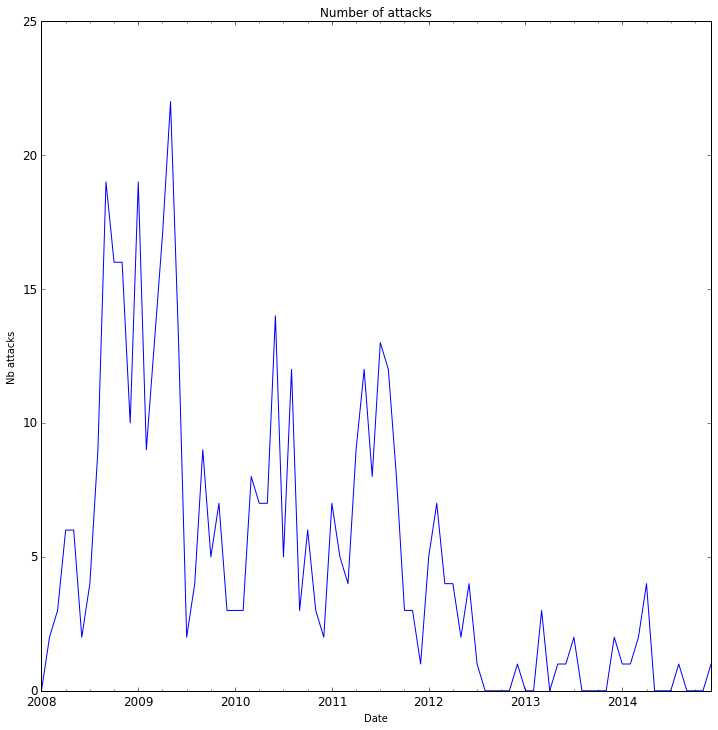

In [5]:
plot_data(df_global)

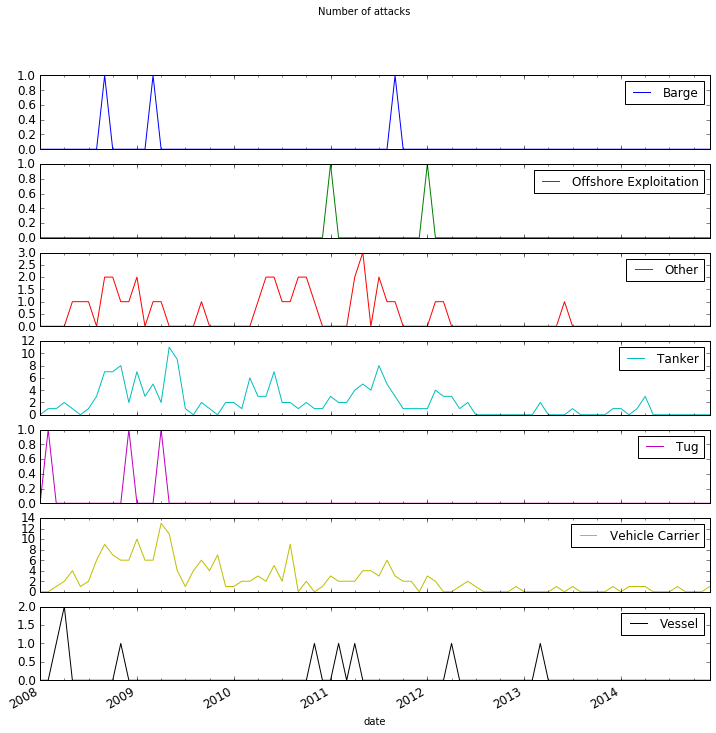

In [6]:
sub_plot_data(df_type)

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries,typeAtta):
    
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    title="Rolling Mean & Standard Deviation : "+str(typeAtta)
    plt.title(title)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

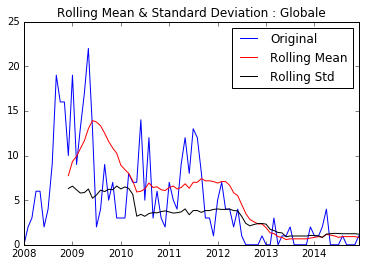

Results of Dickey-Fuller Test:
Test Statistic                 -2.660536
p-value                         0.081120
#Lags Used                      1.000000
Number of Observations Used    82.000000
Critical Value (5%)            -2.897490
Critical Value (1%)            -3.512738
Critical Value (10%)           -2.585949
dtype: float64


In [8]:
test_stationarity(df_global,'Globale')

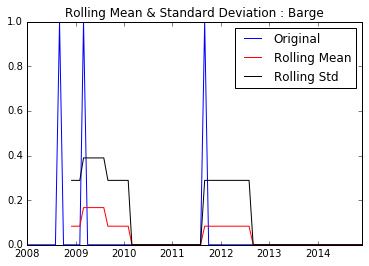

Results of Dickey-Fuller Test:
Test Statistic                 -2.808717
p-value                         0.057039
#Lags Used                      5.000000
Number of Observations Used    78.000000
Critical Value (5%)            -2.899375
Critical Value (1%)            -3.517114
Critical Value (10%)           -2.586955
dtype: float64


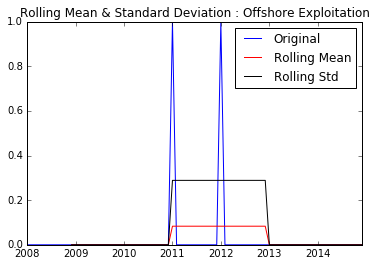

Results of Dickey-Fuller Test:
Test Statistic                -9.225035e+00
p-value                        1.738400e-15
#Lags Used                     0.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (5%)           -2.897048e+00
Critical Value (1%)           -3.511712e+00
Critical Value (10%)          -2.585713e+00
dtype: float64


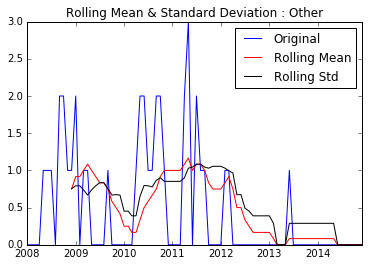

Results of Dickey-Fuller Test:
Test Statistic                 -5.304710
p-value                         0.000005
#Lags Used                      0.000000
Number of Observations Used    83.000000
Critical Value (5%)            -2.897048
Critical Value (1%)            -3.511712
Critical Value (10%)           -2.585713
dtype: float64


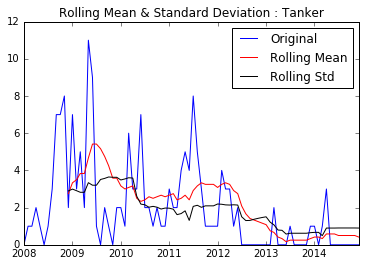

Results of Dickey-Fuller Test:
Test Statistic                 -4.852147
p-value                         0.000043
#Lags Used                      0.000000
Number of Observations Used    83.000000
Critical Value (5%)            -2.897048
Critical Value (1%)            -3.511712
Critical Value (10%)           -2.585713
dtype: float64


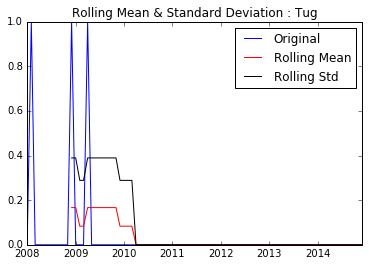

Results of Dickey-Fuller Test:
Test Statistic                 -4.649046
p-value                         0.000105
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (5%)            -2.902607
Critical Value (1%)            -3.524624
Critical Value (10%)           -2.588679
dtype: float64


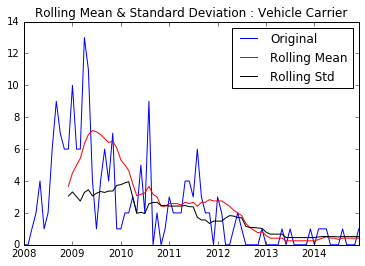

Results of Dickey-Fuller Test:
Test Statistic                 -1.526615
p-value                         0.520307
#Lags Used                      4.000000
Number of Observations Used    79.000000
Critical Value (5%)            -2.898886
Critical Value (1%)            -3.515977
Critical Value (10%)           -2.586694
dtype: float64


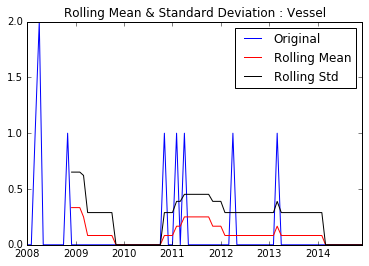

Results of Dickey-Fuller Test:
Test Statistic                -8.123032e+00
p-value                        1.142489e-12
#Lags Used                     0.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (5%)           -2.897048e+00
Critical Value (1%)           -3.511712e+00
Critical Value (10%)          -2.585713e+00
dtype: float64


In [9]:
typeBoat
for i in range(0,len(typeBoat)):
    test_stationarity(df_type[str(typeBoat[i])],str(typeBoat[i]))

# Time Series version 2

In [13]:
to_forecast = df_global.values

to_forecast_Barge = df_type['Barge'].values
to_forecast_OffShore = df_type['Offshore Exploitation'].values
to_forecast_Other = df_type['Other'].values
to_forecast_Tanker = df_type['Tanker'].values
to_forecast_Tug = df_type['Tug'].values
to_forecast_Vehicule = df_type['Vehicle Carrier'].values
to_forecast_Vessel = df_type['Vessel'].values

dates = df['Full_Years'].values
print df.head(5)

            Barge  Offshore Exploitation  Other  Tanker  Tug  Vehicle Carrier  \
date                                                                            
2008-01-01      0                      0      0       0    0                0   
2008-02-01      0                      0      0       1    1                0   
2008-03-01      0                      0      0       1    0                1   
2008-04-01      0                      0      0       2    0                2   
2008-05-01      0                      0      1       1    0                4   

            Vessel   Full_Years  count  
date                                    
2008-01-01       0  2008.083333      0  
2008-02-01       0  2008.166667      2  
2008-03-01       1  2008.250000      3  
2008-04-01       2  2008.333333      6  
2008-05-01       0  2008.416667      6  


In [14]:
import numpy as np

def organize_data(to_forecast, window, horizon):
    """
     Input:
      to_forecast, univariate time series organized as numpy array
      window, number of items to use in the forecast window
      horizon, horizon of the forecast
     Output:
      X, a matrix where each row contains a forecast window
      y, the target values for each row of X
    """
    shape = to_forecast.shape[:-1] + (to_forecast.shape[-1] - window + 1, window)
    strides = to_forecast.strides + (to_forecast.strides[-1],)
    X = np.lib.stride_tricks.as_strided(to_forecast, shape=shape, strides=strides)
    y = np.array([X[i+horizon][-1] for i in range(len(X)-horizon)])
    return X[:-horizon], y

k = 12   # number of previous observations to use
h = 1  # forecast horizon

X,y = organize_data(to_forecast, k, h)

X_Barge , y_Barge = organize_data(to_forecast_Barge, k, h)
X_Off , y_Off = organize_data(to_forecast_OffShore, k, h)
X_Other , y_Other = organize_data(to_forecast_Other, k, h)
X_Tanker , y_Tanker = organize_data(to_forecast_Tanker, k, h)
X_Tug , y_Tug = organize_data(to_forecast_Tug, k, h)
X_Veh , y_Veh = organize_data(to_forecast_Vehicule, k, h)
X_Vessel , y_Vessel = organize_data(to_forecast_Vessel, k, h)


In [15]:
m = 61 # number of samples to take in account
def getPrediction(X,y):
    #regressor = LinearRegression(normalize=True)
    regressor=RandomForestRegressor()
    regressor.fit(X[:m], y[:m])
    predictions=regressor.predict(X)
    predictionError=regressor.predict(X[m:])
    predictions[predictions < 0] = 0
    predictionError[predictionError < 0] = 0
    return np.around(predictions),np.around(predictionError)

predictionGlobal,predictionErrorGlobal=getPrediction(X,y)

prediction_Barge , predictionError_Barge = getPrediction(X_Barge,y_Barge )
prediction_Off , predictionError_Off = getPrediction(X_Off , y_Off)
prediction_Other, predictionError_Other = getPrediction(X_Other , y_Other)
prediction_Tanker , predictionError_Tanker = getPrediction(X_Tanker , y_Tanker)
prediction_Tug , predictionError_Tug = getPrediction(X_Tug , y_Tug)
prediction_Veh , predictionError_Veh = getPrediction(X_Veh , y_Veh)
prediction_Vessel, predictionError_Vessel = getPrediction(X_Vessel , y_Vessel)

In [16]:
def mape(ypred, ytrue):
    """ returns the mean absolute percentage error """
    ypred[ypred < 0] = 0
    idx = ytrue != 0.0
    return 100*np.mean(np.abs(ypred[idx]-ytrue[idx])/ytrue[idx])

print 'The error is %0.2f%%' % mape(predictionErrorGlobal,y[m:])

print 'The error is %0.2f%%' % mape(predictionError_Barge,y_Barge[m:])
print 'The error is %0.2f%%' % mape(predictionError_Off,y_Off[m:])
print 'The error is %0.2f%%' % mape(predictionError_Other,y_Other[m:])
print 'The error is %0.2f%%' % mape(predictionError_Tanker,y_Tanker[m:])
print 'The error is %0.2f%%' % mape(predictionError_Tug,y_Tug[m:])
print 'The error is %0.2f%%' % mape(predictionError_Veh,y_Veh[m:])
print 'The error is %0.2f%%' % mape(predictionError_Vessel,y_Vessel[m:])

The error is 65.00%
The error is nan%
The error is nan%
The error is nan%
The error is 83.33%
The error is nan%
The error is 80.00%
The error is nan%


/Users/romainphilippe/app/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


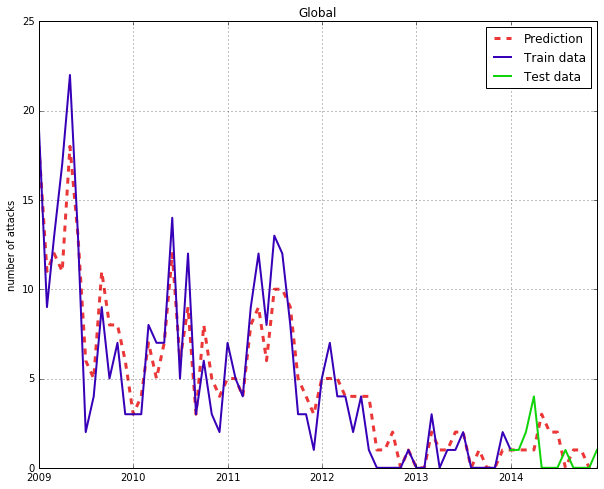

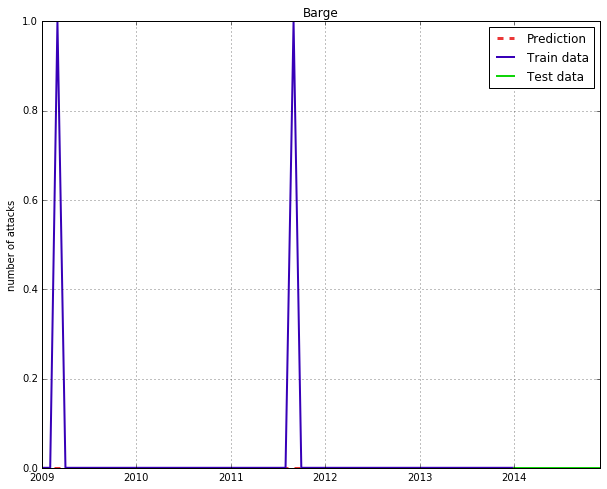

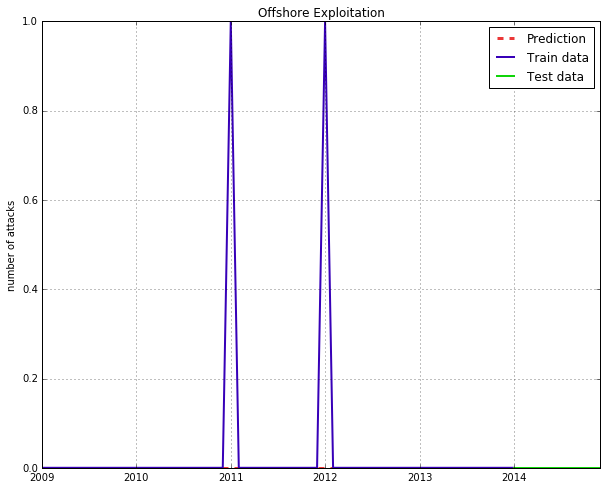

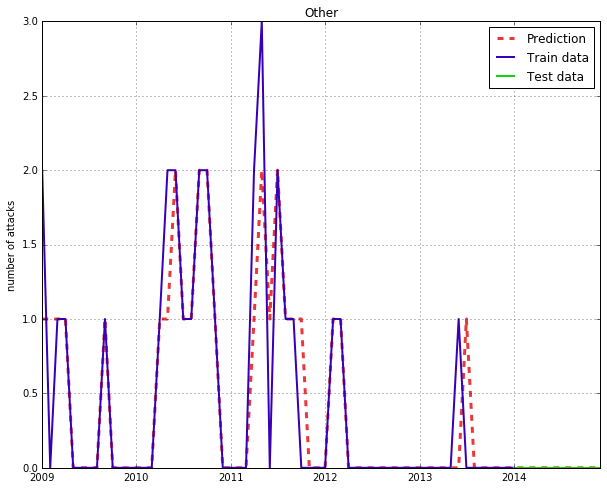

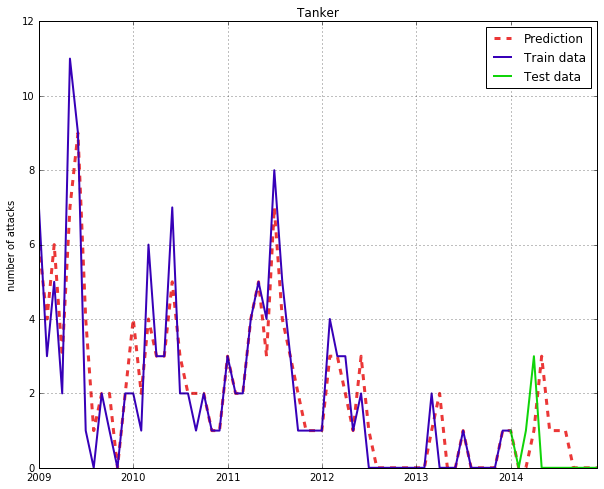

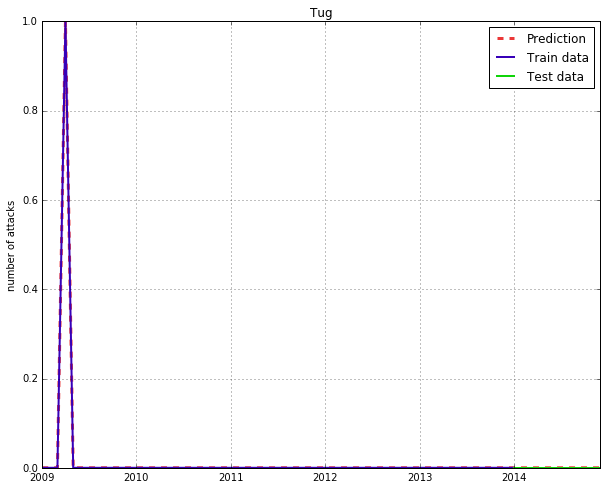

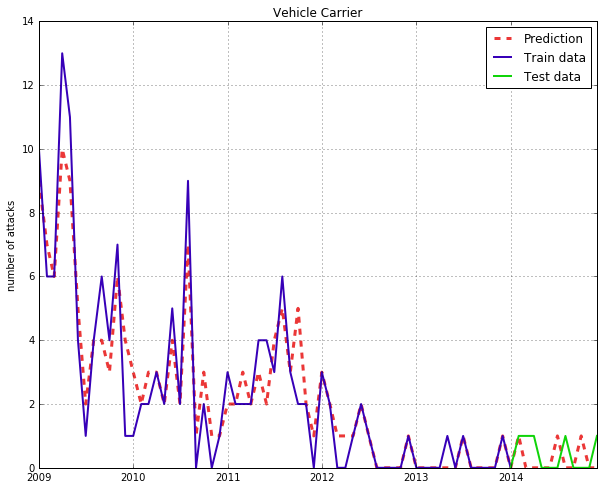

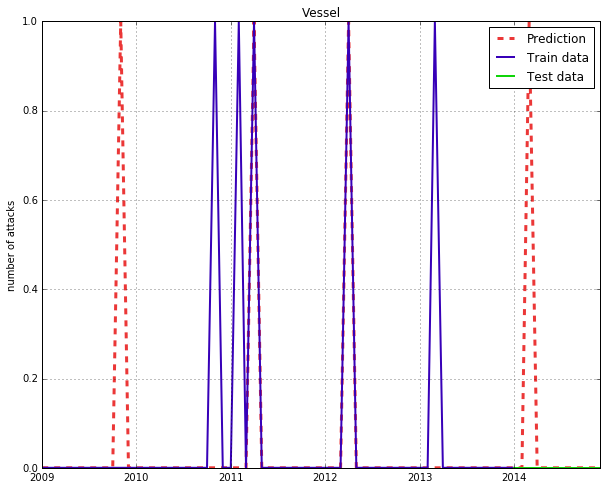

In [17]:
def plotPrediction(prediction,y,title):
    plt.figure(figsize=(10,8))
    plt.plot(listDate[k:],prediction, '--', color='#EB3737', linewidth=3, label='Prediction')
    plt.plot(listDate[k:k+m],y[:m], label='Train data', color='#3700B8', linewidth=2)
    plt.plot(listDate[k+m-1:],y[m-1:], label='Test data', color='#10d409', linewidth=2)
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.title(title)
    plt.ylabel('number of attacks')
    plt.show()

plotPrediction(predictionGlobal,y,"Global")

plotPrediction(prediction_Barge ,y_Barge,"Barge")
plotPrediction(prediction_Off,y_Off,"Offshore Exploitation")
plotPrediction(prediction_Other,y_Other,"Other")
plotPrediction(prediction_Tanker,y_Tanker,"Tanker")
plotPrediction(prediction_Tug,y_Tug,"Tug")
plotPrediction(prediction_Veh,y_Veh,"Vehicle Carrier")
plotPrediction(prediction_Vessel,y_Vessel,"Vessel")
